In [ ]:
import pandas as pd
import re

In [ ]:
df = pd.read_csv("tiktok_comments.csv")
df = df.dropna(subset=["text"])
df["text"] = df["text"].astype(str)

In [4]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer(
    "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
)

embeddings = model.encode(
    df["clean_text"].tolist(),
    show_progress_bar=True
)


Batches: 100%|██████████| 1275/1275 [03:52<00:00,  5.48it/s]


In [5]:
import umap

umap_model = umap.UMAP(
    n_neighbors=15,
    n_components=5,
    metric="cosine",
    random_state=42
)

embeddings_umap = umap_model.fit_transform(embeddings)


c:\Users\User\miniconda3\envs\tiktok_nlp\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [6]:
import hdbscan

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=15,
    min_samples=5,
    metric="euclidean",
    cluster_selection_method="eom"
)

df["cluster"] = clusterer.fit_predict(embeddings_umap)

print(df["cluster"].value_counts().head(10))


cluster
-1      14352
 7       2003
 457     1192
 28       627
 79       568
 124      476
 441      390
 430      381
 155      304
 166      295
Name: count, dtype: int64


In [7]:
def show_cluster(c, n=5):
    print(f"\nCLUSTER {c}")
    samples = df[df["cluster"] == c]["text"].head(n)
    for s in samples:
        print("-", s)

# Xem 10 cluster lớn nhất
for c in df["cluster"].value_counts().head(10).index:
    show_cluster(c)



CLUSTER -1
- quốc kang mua bùa đâu mà mạnh v
- lại dính bùa
- Bùa mạnh vậy
- quen hở
- Bùa có hạn ạ😞

CLUSTER 7
- =))))
- 😫
- 😂
- 😂😂😂
- 🥰

CLUSTER 457
- 4ph-))
- lô chị
- Lạy bà luôn á :))
- Dạ Lâm đâu r?💁🏼
- chịu chj mun r lại dính bùa

CLUSTER 28
- đang buồn mà xem phải bật cười
- t đùa
- Một lần người ta, một lần chúng ta . Không nên cười nói chuyện của người ta .minh cũng đang khổ sao lũ đố .hãy nên làm việt thiện ♥️
- Cười xỉu
- Hài phết

CLUSTER 79
- Nữa hả🙂 [sticker]
- quoccccc kangggg🥰 [sticker]
- quốc kang🤯🤯 [sticker]
- bùa mới hồi chiêu à [sticker]
- 2vk này:)) [sticker]

CLUSTER 124
- ai bảo lấy chồng muộn => là người lấy chồng sớm nhất nhóm bạn😇
- 😂 Chỉ bảo lấy chồng muộn nhưng
- 😞 đam mê lấy chồng tính đẻ con 25 tuổi và giờ sắp 27 còn chưa lấy ai
- 20/10 còn bảo nào 2 người cưới, kêu còn lâu mới cưới. 2 tuần sau mời cưới t luôn, đáng iu. T ăn đẫm cỗ 27,28
- còn đứa nào nói ko lấy ck là bs bảo cưới 🤣🤣🤣☺️

CLUSTER 441
- chịuu em rồi
- 64 ký vừa không ạ
- mua ntn.
- Xin giá 

In [8]:
cluster_sizes = df["cluster"].value_counts().sort_values(ascending=False)
print(cluster_sizes.unique())

[14352  2003  1192   627   568   476   390   381   304   295   286   250
   244   213   211   209   196   192   165   152   150   147   144   141
   133   132   130   129   120   119   116   111   106   105   104   103
   102   100    98    97    96    95    92    91    89    88    85    84
    83    81    78    76    75    74    73    72    71    69    68    67
    66    65    64    63    62    61    60    58    57    56    55    54
    53    52    51    50    49    48    47    46    45    44    43    42
    41    40    39    38    37    36    35    34    33    32    31    30
    29    28    27    26    25    24    23    22    21    20    19    18
    17    16    15]


In [9]:
def show_cluster(c, n=5):
    samples = df[df["cluster"] == c]["text"].head(n)
    print(f"\nCLUSTER {c}")
    for s in samples:
        print("-", s)

# Xem 10 cluster lớn nhất
for c in cluster_sizes.head(10).index:
    show_cluster(c)


CLUSTER -1
- quốc kang mua bùa đâu mà mạnh v
- lại dính bùa
- Bùa mạnh vậy
- quen hở
- Bùa có hạn ạ😞

CLUSTER 7
- =))))
- 😫
- 😂
- 😂😂😂
- 🥰

CLUSTER 457
- 4ph-))
- lô chị
- Lạy bà luôn á :))
- Dạ Lâm đâu r?💁🏼
- chịu chj mun r lại dính bùa

CLUSTER 28
- đang buồn mà xem phải bật cười
- t đùa
- Một lần người ta, một lần chúng ta . Không nên cười nói chuyện của người ta .minh cũng đang khổ sao lũ đố .hãy nên làm việt thiện ♥️
- Cười xỉu
- Hài phết

CLUSTER 79
- Nữa hả🙂 [sticker]
- quoccccc kangggg🥰 [sticker]
- quốc kang🤯🤯 [sticker]
- bùa mới hồi chiêu à [sticker]
- 2vk này:)) [sticker]

CLUSTER 124
- ai bảo lấy chồng muộn => là người lấy chồng sớm nhất nhóm bạn😇
- 😂 Chỉ bảo lấy chồng muộn nhưng
- 😞 đam mê lấy chồng tính đẻ con 25 tuổi và giờ sắp 27 còn chưa lấy ai
- 20/10 còn bảo nào 2 người cưới, kêu còn lâu mới cưới. 2 tuần sau mời cưới t luôn, đáng iu. T ăn đẫm cỗ 27,28
- còn đứa nào nói ko lấy ck là bs bảo cưới 🤣🤣🤣☺️

CLUSTER 441
- chịuu em rồi
- 64 ký vừa không ạ
- mua ntn.
- Xin giá 

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)

for c in cluster_sizes.head(10).index:
    texts = df[df["cluster"] == c]["clean_text"]
    if len(texts) < 5:
        continue
    X = vectorizer.fit_transform(texts)
    keywords = vectorizer.get_feature_names_out()[:10]
    print(f"Cluster {c} keywords:", keywords)

Cluster -1 keywords: ['aa' 'abang' 'ac' 'acc' 'ad' 'ada' 'add' 'adidaphat' 'ae' 'ah']
Cluster 7 keywords: ['uk']
Cluster 457 keywords: ['_viethoang_' 'aa' 'aai' 'abla' 'abu' 'abysjvwej' 'ac' 'acc' 'acid' 'ad']
Cluster 28 keywords: ['abit' 'ad' 'ae' 'af' 'ah' 'ai' 'aint' 'allah' 'always' 'am']
Cluster 79 keywords: ['aaaaaaaaaaaaaaaaaaaaa' 'abajo' 'about' 'aduh' 'ae' 'ahhhhh' 'ai' 'aihoi'
 'alloh' 'alo']
Cluster 124 keywords: ['abang' 'abg' 'ac' 'ae' 'ah' 'ai' 'ak' 'aku' 'an' 'anh']
Cluster 441 keywords: ['aaa' 'aburre' 'acc' 'ad' 'add' 'ae' 'ah' 'ahora' 'ai' 'akala']
Cluster 430 keywords: ['absolutamente' 'ad' 'add' 'adidaphat' 'afrique' 'ahh' 'ai' 'alberto'
 'amé' 'anh']
Cluster 155 keywords: ['acj' 'ae' 'ah' 'ahahahah' 'ai' 'ak' 'an' 'anbruna' 'anh' 'are']
Cluster 166 keywords: ['_ゝ' 'aa' 'about' 'acc' 'adyvpucnb' 'ae' 'ah' 'ai' 'ak' 'akylqmnll']


In [11]:
cluster_to_behavior = {
    -1: "Spam / Noise",
    0: "Tích cực",
    1: "Đùa vui / Cà khịa",
    2: "Tiêu cực / Toxic",
    3: "Hỏi thông tin",
    4: "Nghi ngờ / Bàn tán",
    # các cluster khác map dần...
}

df["behavior_label"] = df["cluster"].map(cluster_to_behavior)
df["behavior_label"] = df["behavior_label"].fillna("Khác / Ít dữ liệu")


In [12]:
from sklearn.metrics import silhouette_score

mask = df["cluster"] != -1
score = silhouette_score(
    embeddings_umap[mask],
    df.loc[mask, "cluster"]
)

print("Silhouette Score:", score)


Silhouette Score: 0.6204671263694763


In [13]:
df.to_csv("tiktok_comment_clustered.csv", index=False)

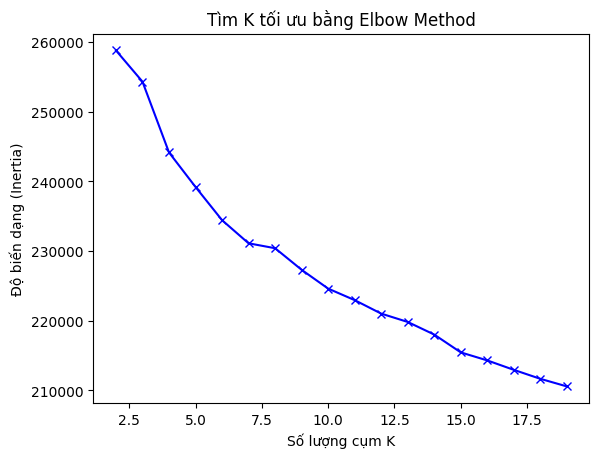

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = []
K_range = range(2, 20) 
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(embeddings)
    distortions.append(km.inertia_)

plt.plot(K_range, distortions, 'bx-')
plt.xlabel('Số lượng cụm K')
plt.ylabel('Độ biến dạng (Inertia)')
plt.title('Tìm K tối ưu bằng Elbow Method')
plt.show()

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_keywords(data, clusters, n_terms=5):
    df_temp = pd.DataFrame({'text': data, 'cluster': clusters})
    for i in range(max(clusters) + 1):
        texts = df_temp[df_temp['cluster'] == i]['text']
        # Dùng CountVectorizer để đếm từ khóa
        vec = CountVectorizer(stop_words=['là', 'của', 'và', 'có']).fit(texts)
        bag_of_words = vec.transform(texts)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
        print(f"Cụm {i} Top Keywords: {words_freq[:n_terms]}")

get_top_keywords(df['text'], df['cluster'])

Cụm 0 Top Keywords: [('toilatoibankhongbiet2222', np.int64(1)), ('cgt6', np.int64(1)), ('mt', np.int64(1)), ('ok', np.int64(1)), ('ᴍɪsᴀ𝜗𝜚', np.int64(1))]
Cụm 1 Top Keywords: [('omg', np.int64(16)), ('omggg', np.int64(1))]
Cụm 2 Top Keywords: [('more', np.int64(105))]
Cụm 3 Top Keywords: [('sớm', np.int64(100)), ('úi', np.int64(1)), ('temprano', np.int64(1)), ('ui', np.int64(1)), ('siêu', np.int64(1))]
Cụm 4 Top Keywords: [('sticker', np.int64(213)), ('iq', np.int64(1)), ('99999999', np.int64(1)), ('hi', np.int64(1)), ('nyc', np.int64(1))]
Cụm 5 Top Keywords: [('hay', np.int64(45)), ('70', np.int64(1)), ('nhac', np.int64(1)), ('hayy', np.int64(1))]
Cụm 6 Top Keywords: [('tim', np.int64(18)), ('sticker', np.int64(16)), ('để', np.int64(10)), ('dừng', np.int64(9)), ('ngừng', np.int64(9))]
Cụm 7 Top Keywords: [('67', np.int64(3)), ('100', np.int64(3)), ('477', np.int64(3)), ('nghĩanghĩa217', np.int64(2)), ('12', np.int64(2))]
Cụm 8 Top Keywords: [('di', np.int64(21)), ('đà', np.int64(21)), 

In [16]:
#save file
df.to_csv("tiktok_comment_clustered_final.csv", index=False)